In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

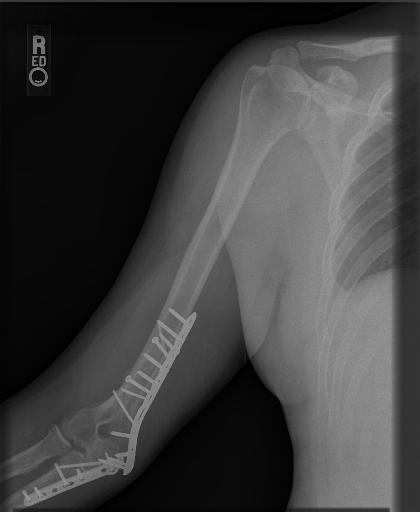

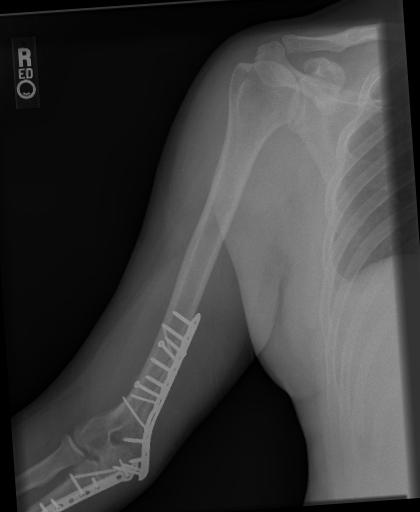

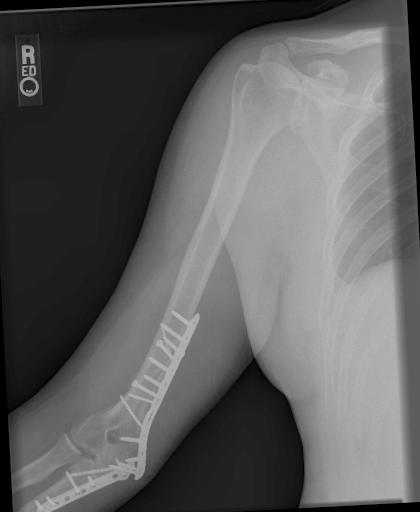

In [4]:
import cv2
import os
from google.colab.patches import cv2_imshow

imgs_dir = "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/images"
labels_dir = "/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels"

target_class = 3

for file in os.listdir(imgs_dir):
    if not file.endswith(".jpg") and not file.endswith(".png"):
        continue

    img_path = os.path.join(imgs_dir, file)
    label_path = os.path.join(labels_dir, file.replace('.jpg', '.txt').replace('.png', '.txt'))

    if not os.path.exists(label_path):
        continue

    with open(label_path, "r") as f:
        lines = f.readlines()
        found = False
        for line in lines:
            class_id = int(line.split()[0])
            if class_id == target_class:
                found = True
                break

    if found:
        img = cv2.imread(img_path)
        cv2_imshow(img)


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data='/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml' epochs=120 imgsz=640 batch=32

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 85.0MB/s]
Ultralytics 8.3.160 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, forma

In [ ]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/test/images imgsz=640 conf=0.4

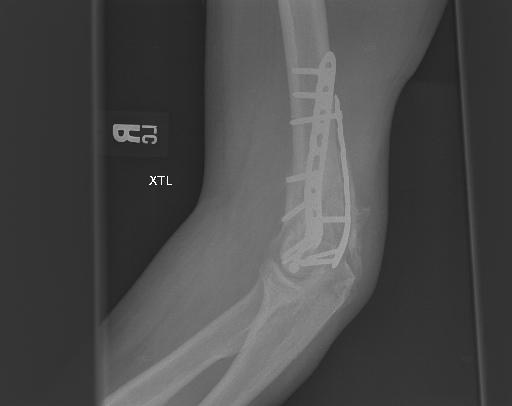

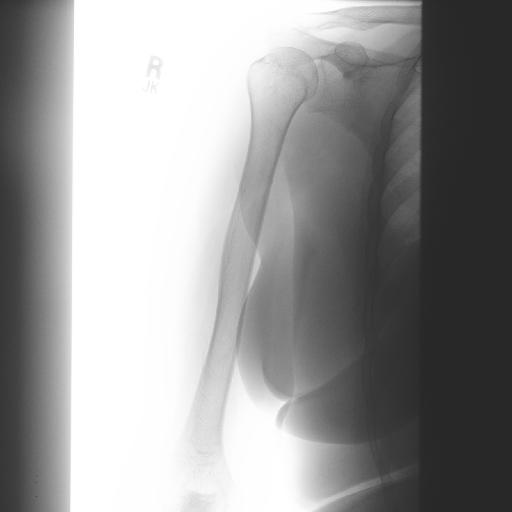

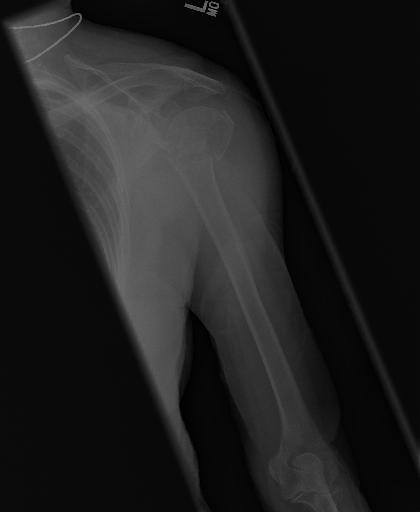

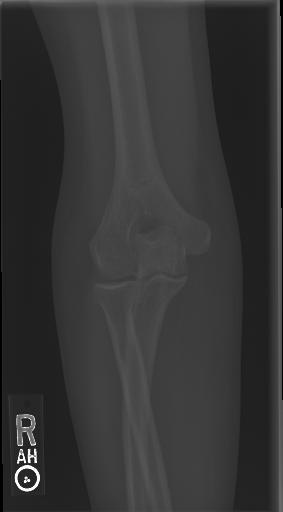

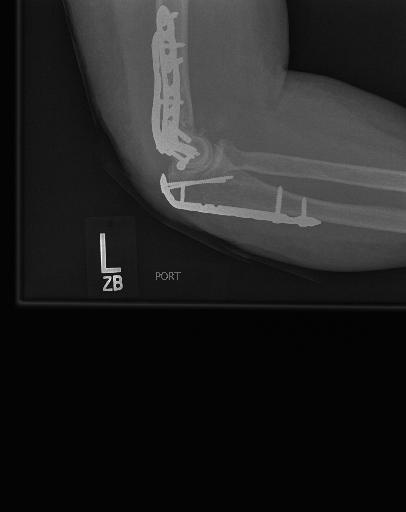

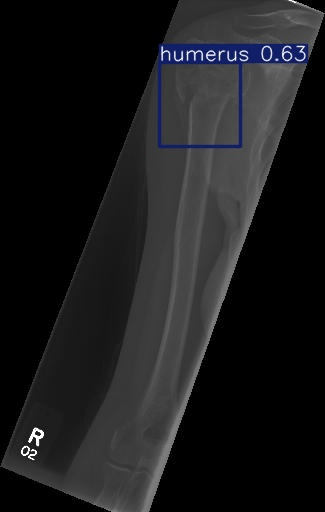

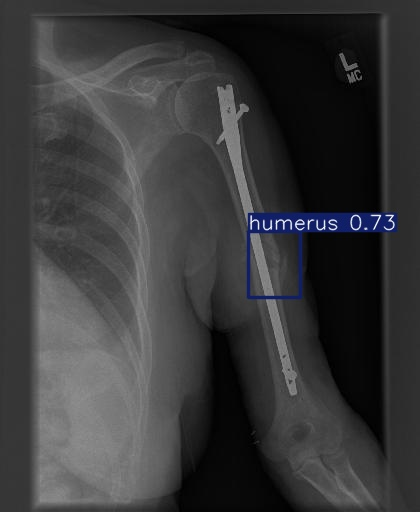

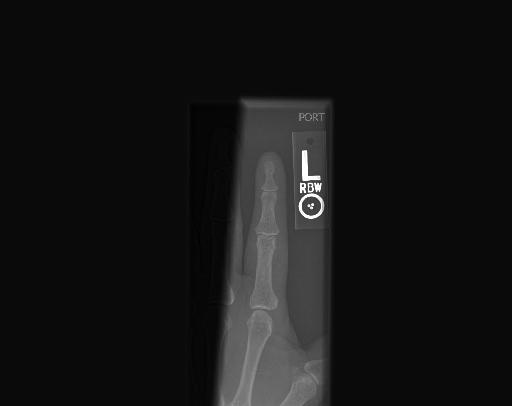

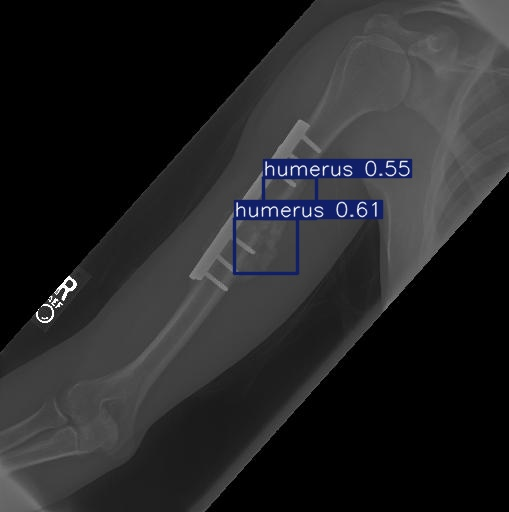

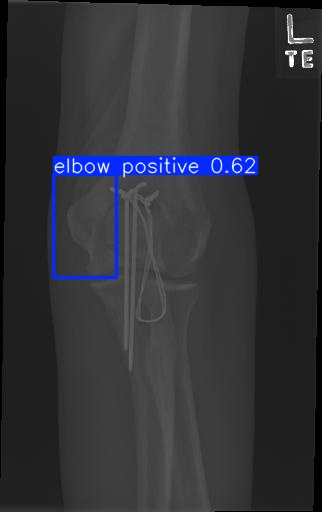

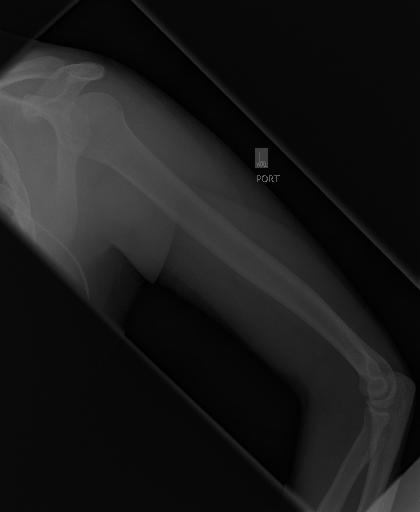

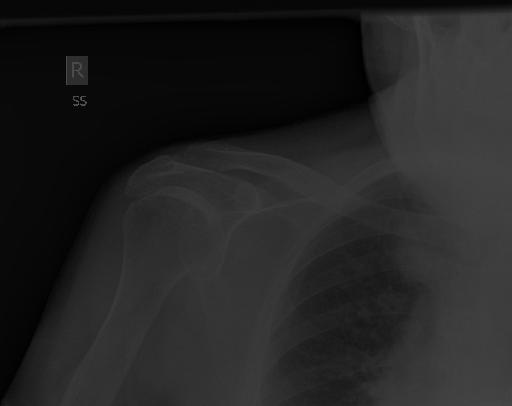

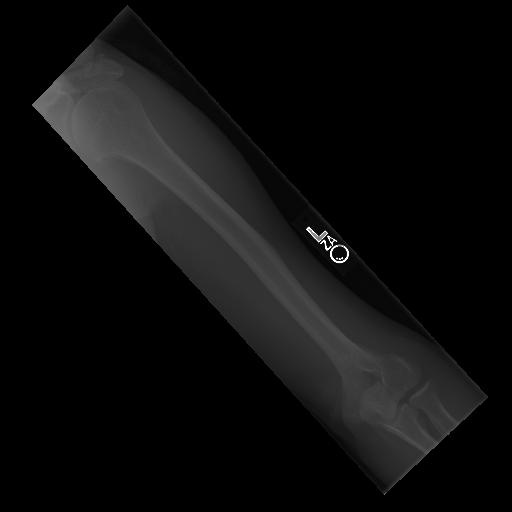

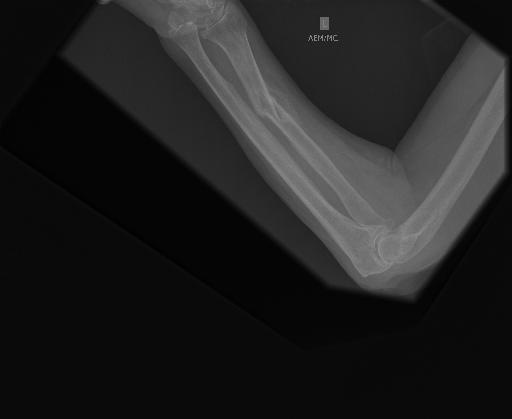

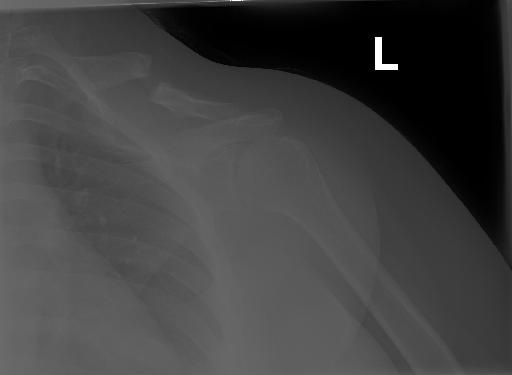

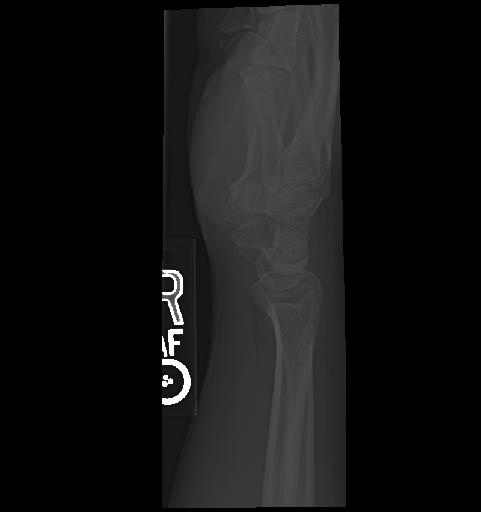

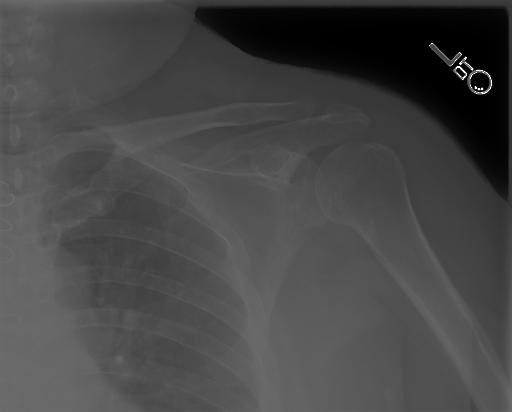

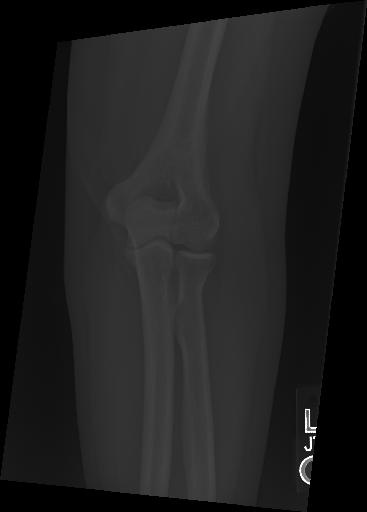

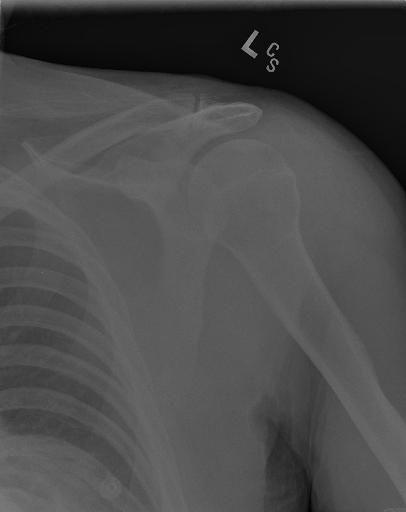

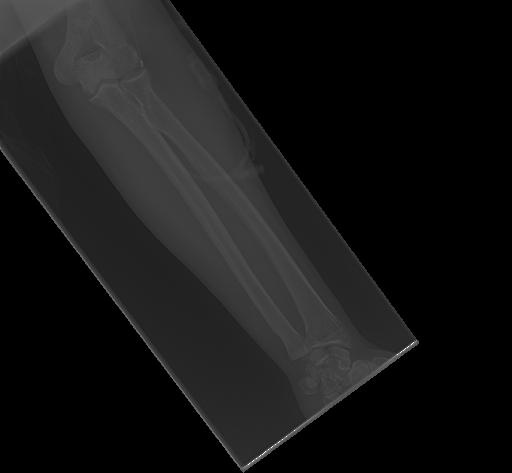

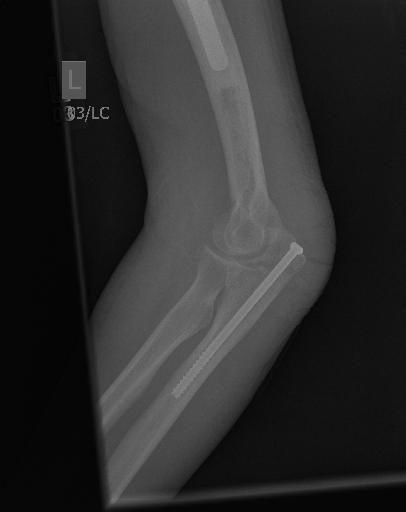

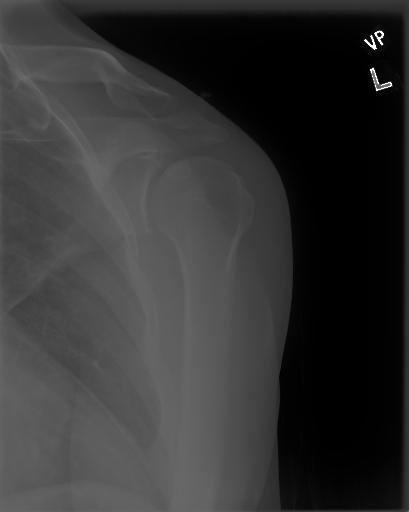

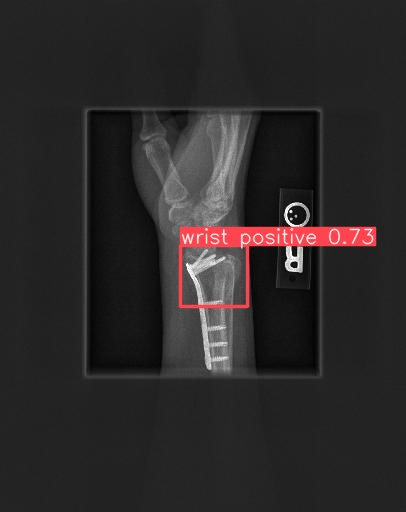

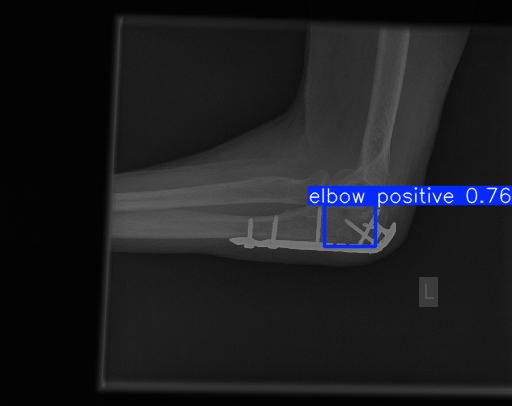

In [16]:
preds_dir= "/kaggle/working/runs/detect/predict"


for file in os.listdir(preds_dir)[26:50]:
    img= cv2.imread(os.path.join(preds_dir, file))
    cv2_imshow(img)

    print("\n")